In [2]:
from liblibra_core import *
from libra_py import *
import math
import py3Dmol

import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

In [4]:
params = {"nsteps":100, "nperiods":1, "scale":250.0, "visualize":0, "verbosity":0, "prefix":"_Si8_cov_flag0"}

R, V, A, M, E = QE_methods.read_md_data("au-c60.xml")

print(R.num_of_rows, R.num_of_cols)

"""
C = QE_methods.read_md_data_cell("au-c60.xml")

print C.get(0,0), C.get(1,0), C.get(2,0)
print C.get(3,0), C.get(4,0), C.get(5,0)
print C.get(6,0), C.get(7,0), C.get(8,0)

H = MATRIX3x3()
H.xx = C.get(0,0);  H.xy = C.get(0,1);  H.xz = C.get(0,2);
H.yx = C.get(1,0);  H.yy = C.get(1,1);  H.yz = C.get(1,2);
H.zx = C.get(2,0);  H.zy = C.get(2,1);  H.zz = C.get(2,2);

tH = H.T()
fR = fold_coords(R, tH, "a")
"""

324 499


'\nC = QE_methods.read_md_data_cell("au-c60.xml")\n\nprint C.get(0,0), C.get(1,0), C.get(2,0)\nprint C.get(3,0), C.get(4,0), C.get(5,0)\nprint C.get(6,0), C.get(7,0), C.get(8,0)\n\nH = MATRIX3x3()\nH.xx = C.get(0,0);  H.xy = C.get(0,1);  H.xz = C.get(0,2);\nH.yx = C.get(1,0);  H.yy = C.get(1,1);  H.yz = C.get(1,2);\nH.zx = C.get(2,0);  H.zy = C.get(2,1);  H.zz = C.get(2,2);\n\ntH = H.T()\nfR = fold_coords(R, tH, "a")\n'

### Method 1:

Strachan, A. Normal Modes and Frequencies from Covariances in Molecular Dynamics 
    or Monte Carlo Simulation. J. Chem. Phys. 2003, 120, 1-4.
    
In the following 2 calls *res* is a tuple (w, w_inv_cm, U_v,  w2, w2_inv_cm, U_a)

In [5]:
params.update({"cov_flag":0})
res00 = normal_modes.compute_cov( R, V, A, M, E, params)

Another option is to use data centered around the averages (fluctuations)

In [6]:
params.update({"cov_flag":1})
res01 = normal_modes.compute_cov( R, V, A, M, E, params)

### Method 2:
Pereverzev, A.; Sewell, T. D. Obtaining the Hessian from the Force Covariance Matrix:
    Application to Crystalline Explosives PETN and RDX. J. Chem. Phys. 2015, 142, 134110.
    
In the following 2 calls *res* is a tuple (w_a, w_inv_cm, U_a)
Again, without centering:

In [7]:
params.update({"cov_flag":0})
res20 = normal_modes.compute_cov2( R, A, M, E, 300.0, params)

With the centering:

In [8]:
params.update({"cov_flag":1})
res21 = normal_modes.compute_cov2( R, A, M, E, 300.0, params)

Now, we can select which normal modes to visualize:

In [9]:
ndof = R.num_of_rows
dat001 = []
dat004 = []
for i in range(ndof):
    dat001.append(res01[1].get(i))
    dat004.append(res01[4].get(i))
    print("Mode %i   %5.0f   %5.0f cm^{-1}" % (i, res01[1].get(i), res01[4].get(i)))

Mode 0     455     508 cm^{-1}
Mode 1     487     381 cm^{-1}
Mode 2     283     416 cm^{-1}
Mode 3   19372     101 cm^{-1}
Mode 4   19085     102 cm^{-1}
Mode 5   18314     100 cm^{-1}
Mode 6   18003     105 cm^{-1}
Mode 7   18096     105 cm^{-1}
Mode 8   17695     106 cm^{-1}
Mode 9   17833     106 cm^{-1}
Mode 10   17374     106 cm^{-1}
Mode 11   17776     107 cm^{-1}
Mode 12   17879     109 cm^{-1}
Mode 13   17063     106 cm^{-1}
Mode 14   17512     107 cm^{-1}
Mode 15   17459     109 cm^{-1}
Mode 16   17206     110 cm^{-1}
Mode 17   16443     109 cm^{-1}
Mode 18   16693     109 cm^{-1}
Mode 19   16722     110 cm^{-1}
Mode 20   16728     111 cm^{-1}
Mode 21   16458     111 cm^{-1}
Mode 22   16582     111 cm^{-1}
Mode 23   16249     110 cm^{-1}
Mode 24   16309     111 cm^{-1}
Mode 25   15943     110 cm^{-1}
Mode 26   16152     112 cm^{-1}
Mode 27   16104     113 cm^{-1}
Mode 28   15893     113 cm^{-1}
Mode 29   15866     113 cm^{-1}
Mode 30   15876     114 cm^{-1}
Mode 31   15790   

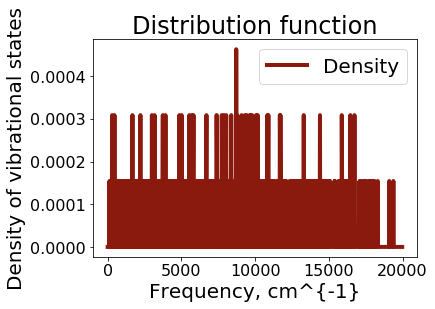

In [10]:
w = []
for i in range(1000):
    w.append(20.0*i)

z = DATA(dat001)

dens, cum = z.Calculate_Distribution(w)

plt.title('Distribution function')
plt.xlabel('Frequency, cm^{-1}')
plt.ylabel('Density of vibrational states')
plt.plot(w, dens, label='Density', linewidth=4, color = colors["11"]) 
plt.legend()
plt.show()
plt.close()

In [13]:
mode = 20
ampl = 2000

# Method 1
xyz00v = normal_modes.get_xyz(E,R, M, res00[2], mode)  # velocity covariance
xyz00a = normal_modes.get_xyz(E,R, M, res00[5], mode)  # acceleration covariance
xyz01v = normal_modes.get_xyz(E,R, M, res01[2], mode)  # velocity fluctuation covariance
xyz01a = normal_modes.get_xyz(E,R, M, res01[5], mode)  # acceleration fluctuation covariance

# Method 2
xyz20f = normal_modes.get_xyz(E,R, M, res20[2], mode)  # force covariance
xyz21f = normal_modes.get_xyz(E,R, M, res21[2], mode)  # force fluctuation covariance


view = py3Dmol.view(width=1000,height=800, linked=False,viewergrid=(3,2))
view.addModel(xyz00v,'xyz',{'vibrate': {'frames':10,'amplitude':ampl}}, viewer=(0,0))
view.addModel(xyz01v,'xyz',{'vibrate': {'frames':10,'amplitude':ampl}}, viewer=(0,1))

view.addModel(xyz00a,'xyz',{'vibrate': {'frames':10,'amplitude':ampl}}, viewer=(1,0))
view.addModel(xyz01a,'xyz',{'vibrate': {'frames':10,'amplitude':ampl}}, viewer=(1,1))

view.addModel(xyz20f,'xyz',{'vibrate': {'frames':10,'amplitude':ampl}}, viewer=(2,0))
view.addModel(xyz21f,'xyz',{'vibrate': {'frames':10,'amplitude':ampl}}, viewer=(2,1))

view.setBackgroundColor('0xeeeeee')
view.setStyle({'sphere':{}})
view.animate({'loop': 'backAndForth'})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol